<a href="https://colab.research.google.com/github/cicerojr10/redeNeuralML/blob/main/rede_NeuralDoZero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
import os
import zipfile
import shutil

# --- Configuração Essencial ---
# Substitua pelo ID do seu arquivo .zip compartilhado no Google Drive
google_drive_file_id = '1bjCsHOuHnhsGj5eWt82oRh3J2B-dObz0'

# Nome do arquivo zip como será salvo no Colab
output_zip_filename = 'dataset.zip'

# Pasta de destino para extrair os arquivos
extract_to_folder = '/content/meu_dataset_extraido/'

# --- Caminhos Derivados ---
zip_path = f'/content/{output_zip_filename}'

# --- Limpeza Prévia (Opcional, mas recomendado) ---
print("Limpando arquivos/pastas de execuções anteriores...")
if os.path.exists(zip_path):
    os.remove(zip_path)
    print(f" - Arquivo zip anterior removido: {zip_path}")
if os.path.exists(extract_to_folder):
    shutil.rmtree(extract_to_folder)
    print(f" - Pasta de extração anterior removida: {extract_to_folder}")
print("Limpeza concluída.")

# --- Download do Arquivo do Google Drive ---
print(f"\nBaixando {output_zip_filename} (ID: {google_drive_file_id})...")
try:
    gdown.download(id=google_drive_file_id, output=zip_path, quiet=False)
    print("Download finalizado.")
except Exception as e:
    print(f"\n!!! ERRO NO DOWNLOAD !!!")
    print(f"Falha ao baixar o arquivo: {e}")
    print("Verifique o ID do arquivo e as permissões de compartilhamento.")
    exit() # Interrompe se o download falhar

# --- Descompactação do Arquivo ZIP ---
print(f"\nDescompactando {output_zip_filename} para {extract_to_folder}...")
if os.path.exists(zip_path) and os.path.getsize(zip_path) > 0:
    try:
        os.makedirs(extract_to_folder, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_folder)
        print("Descompactação concluída.")
        print(f"Arquivos extraídos para: {extract_to_folder}")

        # Opcional: Remover o arquivo zip após a extração
        # print(f"\nRemovendo {zip_path}...")
        # os.remove(zip_path)
        # print("Arquivo .zip removido.")

    except zipfile.BadZipFile:
        print("\n!!! ERRO NA DESCOMPACTAÇÃO !!!")
        print("O arquivo baixado não é um ZIP válido ou está corrompido.")
    except Exception as e:
        print(f"\n!!! ERRO INESPERADO NA DESCOMPACTAÇÃO !!!")
        print(f"Ocorreu um problema: {e}")
else:
    print("\n!!! ERRO !!!")
    print("Não foi possível descompactar. Verifique se o download foi bem-sucedido e se o arquivo não está vazio.")

print("\n--- Processo finalizado. ---")

Limpando arquivos/pastas de execuções anteriores...
 - Arquivo zip anterior removido: /content/dataset.zip
 - Pasta de extração anterior removida: /content/meu_dataset_extraido/
Limpeza concluída.

Baixando dataset.zip (ID: 1bjCsHOuHnhsGj5eWt82oRh3J2B-dObz0)...


Downloading...
From (original): https://drive.google.com/uc?id=1bjCsHOuHnhsGj5eWt82oRh3J2B-dObz0
From (redirected): https://drive.google.com/uc?id=1bjCsHOuHnhsGj5eWt82oRh3J2B-dObz0&confirm=t&uuid=61f9d746-50e1-4571-aead-eda3cad78123
To: /content/dataset.zip
100%|██████████| 40.1M/40.1M [00:00<00:00, 137MB/s]


Download finalizado.

Descompactando dataset.zip para /content/meu_dataset_extraido/...
Descompactação concluída.
Arquivos extraídos para: /content/meu_dataset_extraido/

--- Processo finalizado. ---


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

# Defina o caminho base para o seu dataset
# Ajuste NOME_PASTA_RAIZ_NO_ZIP se a pasta que contém 'datasetCat' e 'datasetDog' for diferente
# Com base no seu script e output:
base_extract_folder = '/content/meu_dataset_extraido/'
nome_pasta_raiz_no_zip = 'dataSet_ProjetoMachineLearning' # A pasta dentro de extract_to_folder que contém as classes
data_dir = os.path.join(base_extract_folder, nome_pasta_raiz_no_zip)

print(f"Diretório do dataset: {data_dir}")
if not os.path.exists(data_dir):
    print(f"ATENÇÃO: O diretório {data_dir} não foi encontrado. Verifique os nomes das pastas.")
else:
    print(f"Conteúdo do diretório do dataset (amostra): {os.listdir(data_dir)[:5]}")

# Parâmetros que usaremos
IMG_WIDTH = 150  # Largura da imagem para redimensionamento
IMG_HEIGHT = 150 # Altura da imagem para redimensionamento
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 32  # Número de imagens por lote

Diretório do dataset: /content/meu_dataset_extraido/dataSet_ProjetoMachineLearning
Conteúdo do diretório do dataset (amostra): ['datasetCat', 'datasetDog']


Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.

Nomes das classes encontradas: ['datasetCat', 'datasetDog']
Número de classes: 2


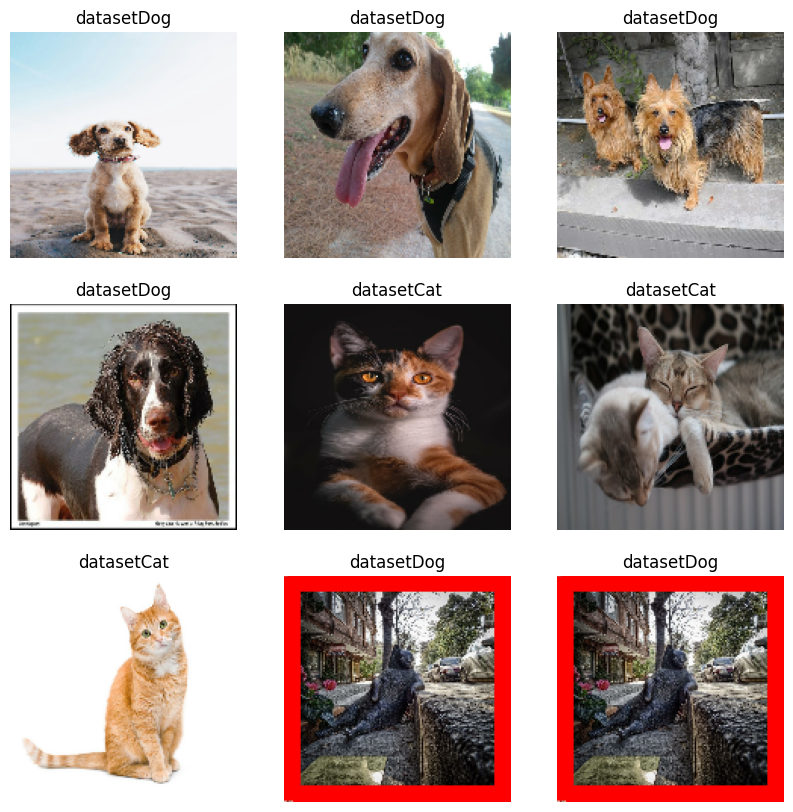


Datasets de treino e validação configurados e otimizados.


In [ ]:
# Carregar o dataset de treinamento
# Vamos usar 80% para treino e 20% para validação
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123, # Semente para reprodutibilidade da divisão e shuffles
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical' # 'categorical' para one-hot encoding (bom para N classes com Softmax)
                             # Se fossem só 2 classes, 'binary' com Sigmoid na saída também funcionaria
)

# Carregar o dataset de validação
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Obter os nomes das classes
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"\nNomes das classes encontradas: {class_names}")
print(f"Número de classes: {num_classes}")

# Opcional: Visualizar algumas imagens do dataset de treinamento
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1): # Pega um lote de imagens
    for i in range(9): # Mostra as 9 primeiras imagens do lote
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # O label estará em one-hot encoding, precisamos converter para o nome da classe
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()


# Otimizar performance de carregamento de dados
# AUTOTUNE permite que tf.data encontre a melhor alocação de recursos dinamicamente
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
print("\nDatasets de treino e validação configurados e otimizados.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


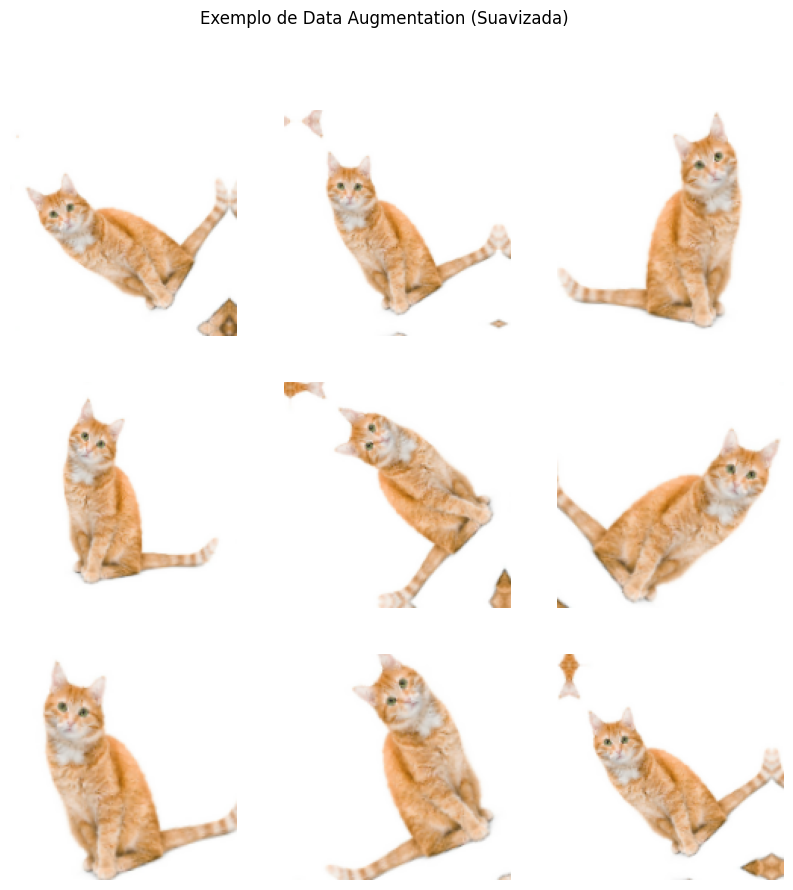


Camada de Data Augmentation (suavizada) definida.


In [ ]:
# BLOCO 4: MODIFICADO (Data Augmentation Suavizada)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        layers.RandomRotation(0.15), # Reduzido de 0.25 para 0.15
        layers.RandomZoom(0.15),    # Reduzido de 0.25 para 0.15
        # Remover RandomBrightness e RandomContrast por enquanto, ou usar valores MUITO baixos
        # layers.RandomBrightness(factor=0.1), # Exemplo se quiser manter, mas bem suave
        # layers.RandomContrast(factor=0.1),  # Exemplo se quiser manter, mas bem suave
    ],
    name="data_augmentation",
)

# Visualizar o efeito da Data Augmentation
for image_batch, _ in train_dataset.take(1): # train_dataset do Bloco 3
    first_image = image_batch[0]
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0), training=True)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")
    plt.suptitle("Exemplo de Data Augmentation (Suavizada)")
    plt.show()
    break

print("\nCamada de Data Augmentation (suavizada) definida.")

In [ ]:
# BLOCO 5: (Manter a arquitetura de ~80% - SEM ALTERAÇÕES EM RELAÇÃO À ÚLTIMA SUGESTÃO)

model = keras.Sequential([
    data_augmentation, # Definida no BLOCO 4 MODIFICADO
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') # num_classes do Bloco 3
])

print("\nModelo CNN (arquitetura de ~80% com Dropout) construído.")
model.summary()


Modelo CNN (arquitetura de ~80% com Dropout) construído.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,402,050 (20.61 MB)

 Trainable params: 5,402,050 (20.61 MB)

 Non-trainable params: 0 (0.00 B)


Modelo compilado.

Iniciando o treinamento por até 100 épocas...
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5139 - loss: 1.4459 - val_accuracy: 0.6750 - val_loss: 0.6734 - learning_rate: 5.0000e-04
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5909 - loss: 0.7518 - val_accuracy: 0.5750 - val_loss: 0.6814 - learning_rate: 5.0000e-04
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5369 - loss: 0.6892 - val_accuracy: 0.7250 - val_loss: 0.6881 - learning_rate: 5.0000e-04
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6241 - loss: 0.6745 - val_accuracy: 0.5000 - val_loss: 0.6902 - learning_rate: 5.0000e-04
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5975 - loss: 0.6775 - val_accuracy: 0.7500 - val_loss: 0.6881 - learning_rate: 5.0000e-04
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5839 - loss: 0.6773 - val_accuracy: 0.7500 - val_loss: 0.6837 - learning_rate: 5.0000e-04
Epoch 7/100
5/5 ━━

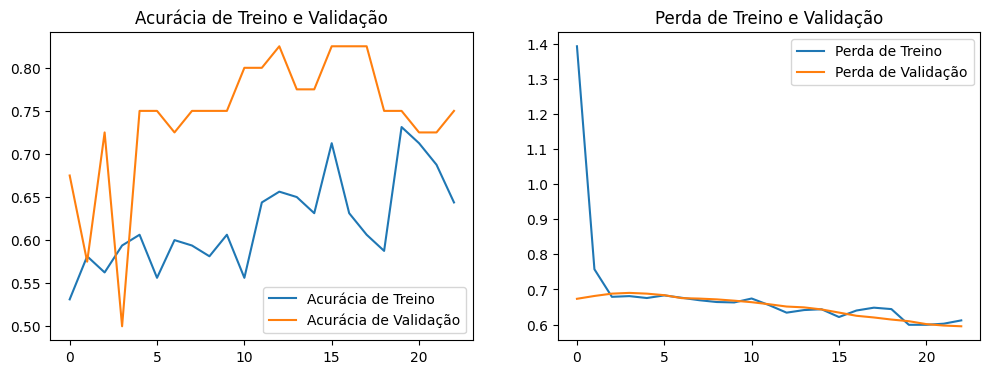

In [ ]:
# BLOCO 6: MODIFICADO

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005), # Manter LR inicial
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\nModelo compilado.")

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,               # Reduzida para 10 (era 15)
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=7,              # Aumentada para 7 (era 5)
    min_lr=0.00001,
    verbose=1
)

epochs = 100

print(f"\nIniciando o treinamento por até {epochs} épocas...")
history = model.fit(
    train_dataset, # Do Bloco 3
    validation_data=validation_dataset, # Do Bloco 3
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

print("\nTreinamento concluído.")

print("\n--- Avaliando o modelo no conjunto de validação ---")
val_loss, val_accuracy = model.evaluate(validation_dataset)
print(f"Perda na validação: {val_loss:.4f}")
print(f"Acurácia na validação: {val_accuracy*100:.2f}%")

# Código de plotagem permanece o mesmo...
effective_epochs = len(history.history['loss'])
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(effective_epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')

if 'lr' in history.history:
    lr = history.history['lr']
    plt.figure(figsize=(6, 4))
    plt.plot(epochs_range, lr, label='Taxa de Aprendizado')
    plt.legend(loc='upper right')
    plt.title('Taxa de Aprendizado ao Longo das Épocas')
    plt.xlabel('Época')
    plt.ylabel('Taxa de Aprendizado')

plt.show()